# Project DescriptionTwitter US Airline Sentiment - Warren Camp


### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").


###  Dataset: 

The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
 tweet_id
 airline_sentiment
 airline_sentiment_confidence
 negativereason
 negativereason_confidence
 airline
 airline_sentiment_gold
 name
 negativereason_gold
 retweet_count
 text
 tweet_coord
 tweet_created
 tweet_location
 user_timezone

### Steps and tasks:

1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)

In [ ]:
!pip3 --version
!pip install pyyaml h5py  # Required to save models in HDF5 format
!pip install contractions

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [ ]:
# 1. Import Libraries
import cv2
import contractions                                     # Import contractions library.
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk                                             #Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('wordnet')
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer. 
from nltk.corpus import stopwords                       #Stopwords corpus
from nltk.stem import PorterStemmer                     #Stemmer
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF      
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from google.colab import drive
from google.colab.patches import cv2_imshow
from bs4 import BeautifulSoup
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Load data
df = pd.read_csv('/content/drive/My Drive/Data/Tweets.csv')    # Load the dataset by providing the path to the file.
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# 1. Print data shape and description
print('df Shape: ', df.shape)
print(df.info())

df Shape:  (14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 n

### Observation: Tweets dataset contains 14,640 rows (features) and 15 columns (labels).


### 2. Understand the data

In [ ]:
# 2a. Drop all other columns except “text” and “airline_sentiment”
X = df[['text', 'airline_sentiment']]
X.airline_sentiment.value_counts()/len(X)


negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


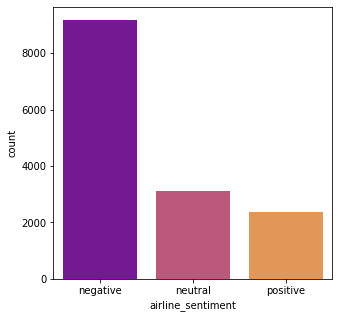

In [ ]:
# Visualize the number of sentiments as negative, neutral, and positive
plt.figure(figsize=(5,5))
sns.countplot(X['airline_sentiment'], order = X.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

### Observation:  The data is embalanced with negative tweets greater than the sum of the two other types of tweets.

In [ ]:
# 2b.  Check the shape of data. 
print(X.shape)
X.isnull().sum(axis=0)     

(14640, 2)


text                 0
airline_sentiment    0
dtype: int64

### Observation: The data has no missing values and contains 14,640 tweets.

In [ ]:
# 2c. Print first 5 rows of data.
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)10
print(X.head(5))

                                                                                                                             text airline_sentiment
0                                                                                             @VirginAmerica What @dhepburn said.           neutral
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.          positive
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!           neutral
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse          negative
4                                                                         @VirginAmerica and it's a really big bad thing about it          negative


### 3. Text pre-processing: Data preparation


In [ ]:
# 3a.
sw = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(sw) - set(customlist))  

lemmatizer = WordNetLemmatizer()

In [ ]:
# Html tag removal, function to remove HTML tags
def remove_html_tags(textcpy):
    """Remove HTML tags in string of text"""
    return BeautifulSoup(textcpy, 'html.parser').get_text()
 

In [ ]:
# Remove Underscore
def remove_underscore (textcpy):
    return re.sub(r'_', '', textcpy)

In [ ]:
def remove_contractions(textcpy):
    """Remove contractions in string of text"""
    return contractions.fix(textcpy)

In [ ]:
def remove_numbers(textcpy):
  """Remove numbers in string of text"""
  return re.sub(r'\d+', '', textcpy)


In [ ]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words    

In [ ]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


In [ ]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [ ]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [ ]:
def join_words(words):          
    return ' '.join(map(str, words))     


### 3a. Remove HTML Tags


In [ ]:
X['text'] = X['text'].apply(lambda i: remove_html_tags(i))
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### 3d. Removal of Special Characters and  Punctuations - Contractions

In [ ]:
X['text'] = X['text'].apply(lambda i: remove_contractions(i))
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### 3d. Removal of Special Characters - Underscore

In [ ]:
X['text'] = X['text'].apply(lambda i: remove_underscore(i))
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Observation: A review of the data indicated that underscores('_') were present.  A RE function was created to remove underscores because it is a special character.

### 3c. Remove Numbers


In [ ]:
X['text'] = X['text'].apply(lambda i: remove_numbers(i))
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### 3b. Tokenize data

In [ ]:
X['text'] = X.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
print(X.head())

                                                                                                                                                       text airline_sentiment
0                                                                                                            [@, VirginAmerica, What, @, dhepburn, said, .]           neutral
1                                                               [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]          positive
2                                                              [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]           neutral
3  [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]          negative
4                                                                                    [@, VirginAmerica, and, it, is, a, really, bi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3e. Conversion to lowercase.


In [ ]:
X['text'] = X.apply(lambda row: to_lowercase(row['text']), axis=1)
print(X.head())

                                                                                                                                                       text airline_sentiment
0                                                                                                            [@, virginamerica, what, @, dhepburn, said, .]           neutral
1                                                               [@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]          positive
2                                                              [@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]           neutral
3  [@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]          negative
4                                                                                    [@, virginamerica, and, it, is, a, really, bi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3d. Removal of Non ASCII text

In [ ]:
X['text'] = X.apply(lambda row: remove_non_ascii(row['text']), axis=1)
print(X.head())

                                                                                                                                                       text airline_sentiment
0                                                                                                            [@, virginamerica, what, @, dhepburn, said, .]           neutral
1                                                               [@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]          positive
2                                                              [@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]           neutral
3  [@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]          negative
4                                                                                    [@, virginamerica, and, it, is, a, really, bi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3d. Removal of Special Characters and Punctuations.

In [ ]:
X['text'] = X.apply(lambda row: remove_punctuation(row['text']), axis=1)
print(X.head())

                                                                                                                                      text airline_sentiment
0                                                                                                    [virginamerica, what, dhepburn, said]           neutral
1                                                         [virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]          positive
2                                                        [virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]           neutral
3  [virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]          negative
4                                                                      [virginamerica, and, it, is, a, really, big, bad, thing, about, it]          negative


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Remove Stopwords

In [ ]:
X['text'] = X.apply(lambda row: remove_stopwords(row['text']), axis=1)
print(X.head())

                                                                                                    text airline_sentiment
0                                                                        [virginamerica, dhepburn, said]           neutral
1                                           [virginamerica, plus, added, commercials, experience, tacky]          positive
2                                     [virginamerica, not, today, must, mean, need, take, another, trip]           neutral
3  [virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]          negative
4                                                               [virginamerica, really, big, bad, thing]          negative


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3f. Lemmatize list

In [ ]:
X['text'] = X.apply(lambda row: lemmatize_list(row['text']), axis=1)
print(X.head())

                                                                                                   text airline_sentiment
0                                                                        [virginamerica, dhepburn, say]           neutral
1                                            [virginamerica, plus, add, commercials, experience, tacky]          positive
2                                    [virginamerica, not, today, must, mean, need, take, another, trip]           neutral
3  [virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]          negative
4                                                              [virginamerica, really, big, bad, thing]          negative


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3g. Join the words in the list to convert back to text string in the dataframe. 

In [ ]:
X['text'] = X.apply(lambda row: join_words(row['text']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###  3h. Print first 5 rows of data after pre-processing.

In [ ]:
print(X.head(5))


                                                                                        text airline_sentiment
0                                                                 virginamerica dhepburn say           neutral
1                                        virginamerica plus add commercials experience tacky          positive
2                                   virginamerica not today must mean need take another trip           neutral
3  virginamerica really aggressive blast obnoxious entertainment guests face little recourse          negative
4                                                         virginamerica really big bad thing          negative


### Save the current X values if needed for future use or recovery.

In [ ]:
X_old = X

In [ ]:
print(X_old.shape)
print(X_old.info())

(14640, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB
None


### 4. Vectorization 

### 4a. Use CountVectorizer 

In [ ]:
cv = CountVectorizer()  
X_features = cv.fit_transform(X.text)

In [ ]:
 print(cv.get_feature_names())

['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aaba', 'aacom', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aaron', 'aarp', 'aaso', 'aateam', 'aaus', 'ab', 'aback', 'abandon', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcdef', 'abcletjetbluestreamfeed', 'abcnetwork', 'abcnews', 'abcnewsbayarea', 'abcwtvd', 'abduct', 'abi', 'abidfw', 'abigailedge', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abound', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abt', 'abundance', 'abuse', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'acces', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accidents', 'accomidating', 'accommodate', 'accommodation', 'accommodations', 'accompaniments', 'accompany', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accrue', 'acct', 'acctits', 'accts'

### Observation: A review of the features names indicated the data preparation was successful.

In [ ]:
X_features = X_features.toarray()                        # Convert the data features to array.

In [ ]:
type(X_features)

numpy.ndarray

### Observation: X_features is a sparse matrix, that is most of the values are 0.

In [ ]:
X_features.shape

(14640, 12052)

### Observation: features contain 12,052 words.  No limit was placed on the number of features.

In [ ]:
X_features[1:5, 1:5]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# Convert airline_sentiment to integer encoded labels
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(X.airline_sentiment)
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(values)
print(integer_encoded_labels)
print(integer_encoded_labels.shape)
print(integer_encoded_labels.dtype)

[1 2 1 ... 1 0 1]
(14640,)
int64


In [ ]:
# Convert airline_sentiment to onehot encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_labels)
labels = onehot_encoded
labels = labels.astype('int')
print(labels.shape)
print(labels)


(14640, 3)
[[0 1 0]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


### 5a. Fit and evaluate model using both type of vectorization.

In [ ]:
import time
algo= []
tr = []
te = []
recall = []
precision = []
elapsed = []
target_names = {'negative' : 1, 'neutral' : 2, 'positive' : 3}

### Using Logistic Regression to build model for the classification of reviews.

In [ ]:
t = time.process_time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

lrc = LogisticRegression(random_state=7, max_iter=1000, solver='saga', n_jobs=4, multi_class='auto')
lrc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', lrc.score(X_train, y_train))
print('Test Score: ', lrc.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

Train Score:  0.9354020296643247
Test Score:  0.787568306010929
Elapsed Time: 299.762082561


In [ ]:
result_lrc = lrc.predict(X_test)
algo = ['Logistic Regression']
elapsed = [elapsed_time]
tr = [lrc.score(X_train, y_train)]
te = [lrc.score(X_test, y_test)]
recall = [recall_score(y_test, result_lrc, average='micro')]
precision = [precision_score(y_test, result_lrc, average='micro')]

              precision    recall  f1-score      support
negative       0.855227  0.893319  0.873858  2784.000000
neutral        0.611303  0.569892  0.589872   930.000000
positive       0.716370  0.651917  0.682625   678.000000
accuracy       0.787568  0.787568  0.787568     0.787568
macro avg      0.727633  0.705043  0.715452  4392.000000
weighted avg   0.782141  0.787568  0.784204  4392.000000
[[2487  218   79]
 [ 304  530   96]
 [ 117  119  442]]


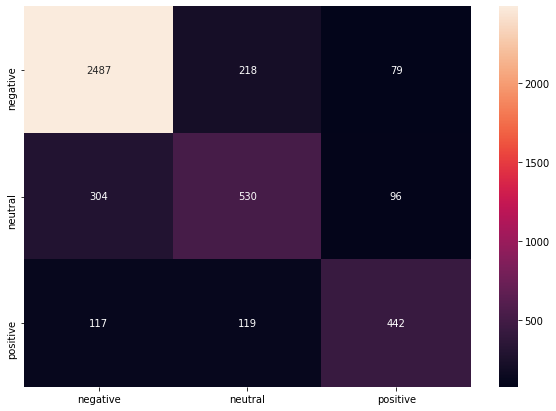

In [ ]:
# Confusion Matrix, Classification report, 
from sklearn.metrics import classification_report
results_log = classification_report(y_test, result_lrc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat = confusion_matrix(y_test, result_lrc)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Using Random Forest to build model for the classification of reviews.

In [ ]:
t = time.process_time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

forest = RandomForestClassifier(n_estimators=100, n_jobs=4)
forest = forest.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', forest.score(X_train, y_train))
print('Test Score: ', forest.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

Train Score:  0.9966822794691648
Test Score:  0.7780054644808743
Elapsed Time: 118.23265923899999


In [ ]:
result_forest = forest.predict(X_test)
algo.append('RandomForest')
elapsed.append(elapsed_time)
tr.append(forest.score(X_train, y_train))
te.append(forest.score(X_test, y_test))
recall.append(recall_score(y_test, result_forest, average='micro'))
precision.append(precision_score(y_test, result_forest, average='micro'))

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
results_log = classification_report(y_test, result_forest, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

              precision    recall  f1-score      support
negative       0.823833  0.918822  0.868738  2784.000000
neutral        0.630728  0.503226  0.559809   930.000000
positive       0.717431  0.576696  0.639411   678.000000
accuracy       0.778005  0.778005  0.778005     0.778005
macro avg      0.723997  0.666248  0.689319  4392.000000
weighted avg   0.766518  0.778005  0.767921  4392.000000


In [ ]:
# Confusion Matrix
conf_mat_forest = confusion_matrix(y_test, result_forest)
print(conf_mat_forest)

[[2558  160   66]
 [ 374  468   88]
 [ 173  114  391]]


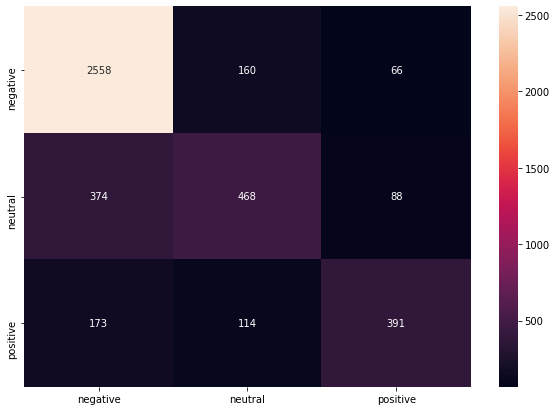

In [ ]:
df_cm = pd.DataFrame(conf_mat_forest, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7)) 
sns.heatmap(df_cm, annot=True, fmt='g')

### Using AdaBoost to build model for the classification of reviews.

In [ ]:
t = time.process_time()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=7, n_estimators= 250, learning_rate=0.1)
abc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', abc.score(X_train, y_train))
print('Test Score: ', abc.score(X_test, y_test))
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

Train Score:  0.8187939110070258
Test Score:  0.7511384335154827
Elapsed Time: 1598.508077256


In [ ]:
result_abc = abc.predict(X_test)
algo.append('AdaBoost')
elapsed.append(elapsed_time)
tr.append(abc.score(X_train, y_train))
te.append(abc.score(X_test, y_test))
recall.append(recall_score(y_test,result_abc, average='micro'))
precision.append(precision_score(y_test, result_abc, average='micro'))

              precision    recall  f1-score      support
negative       0.800507  0.906609  0.850261  2784.000000
neutral        0.560584  0.412903  0.475542   930.000000
positive       0.705776  0.576696  0.634740   678.000000
accuracy       0.751138  0.751138  0.751138     0.751138
macro avg      0.688956  0.632070  0.653514  4392.000000
weighted avg   0.735080  0.751138  0.737644  4392.000000
[[2524  181   79]
 [ 462  384   84]
 [ 167  120  391]]


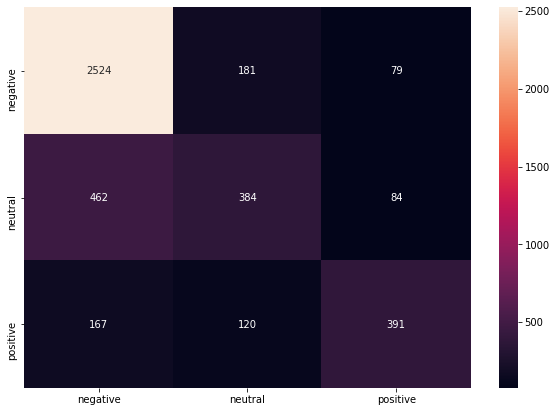

In [ ]:
# Confusion Matrix, Classification report, 
results_log = classification_report(y_test, result_abc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat_abc = confusion_matrix(y_test, result_abc)
print(conf_mat_abc)

df_cm = pd.DataFrame(conf_mat_abc, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Gradient Boosting Classifier

In [ ]:
t = time.process_time()
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

gbc = GradientBoostingClassifier(random_state=7, n_estimators=250, max_depth=5, min_samples_leaf=3)
gbc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', gbc.score(X_train, y_train))
print('Test Score: ', gbc.score(X_test, y_test))
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

Train Score:  0.8476775956284153
Test Score:  0.7691256830601093
Elapsed Time: 5322.985971751999


In [ ]:
result_gbc = gbc.predict(X_test)
algo.append('Gradient Boosting')
elapsed.append(elapsed_time)
tr.append(gbc.score(X_train, y_train))
te.append(gbc.score(X_test, y_test))
recall.append(recall_score(y_test, result_gbc, average='micro'))
precision.append(precision_score(y_test, result_gbc, average='micro'))

In [ ]:
# Confusion Matrix
results_log = classification_report(y_test, result_gbc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

              precision    recall  f1-score      support
negative       0.807161  0.923132  0.861260  2784.000000
neutral        0.628800  0.422581  0.505466   930.000000
positive       0.711835  0.612094  0.658208   678.000000
accuracy       0.769126  0.769126  0.769126     0.769126
macro avg      0.715932  0.652602  0.674978  4392.000000
weighted avg   0.754678  0.769126  0.754576  4392.000000


In [ ]:
conf_mat_gbc = confusion_matrix(y_test, result_gbc)
print(conf_mat_gbc)

[[2570  130   84]
 [ 453  393   84]
 [ 161  102  415]]


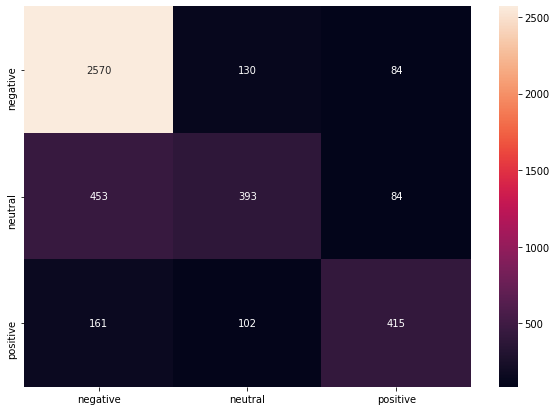

In [ ]:
df_cm = pd.DataFrame(conf_mat_gbc, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
# DataFrame to compare results.
print('\n CountVectorizer Comparsion Classification Results \n')
results_vec = pd.DataFrame()
results_vec['Model'] = algo
results_vec['TrainScore'] = tr
results_vec['TestScore'] = te
results_vec['Recall'] = recall
results_vec['Precision'] = precision
results_vec['ElapsedTime'] = elapsed
results_vec = results_vec.set_index('Model')
print(results_vec)


 CountVectorizer Comparsion Classification Results 

                     TrainScore  TestScore    Recall  Precision  ElapsedTime
Model                                                                       
Logistic Regression    0.935402   0.787568  0.787568   0.787568   299.762083
RandomForest           0.996682   0.778005  0.778005   0.778005   118.232659
AdaBoost               0.818794   0.751138  0.751138   0.751138  1598.508077
Gradient Boosting      0.847678   0.769126  0.769126   0.769126  5322.985972


### Observation: Best results were obtained with Logistic Regression with a test score of .788.  Logistic Regression also had the second lowest elapsed time of 299.  It appears that the Random Forest suffers from overfitting with a training score of .996682.  Minimum tuning was perperformed, therefore it is reasonable to expect that better performance is possible.

### 4b. Use TfidfVectorizer.

In [ ]:
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 1))
X_features = vectorizer.fit_transform(X['text'])

print(vectorizer.get_feature_names())

X_features = X_features.toarray()
  
X_features.shape

['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aaba', 'aacom', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aaron', 'aarp', 'aaso', 'aateam', 'aaus', 'ab', 'aback', 'abandon', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcdef', 'abcletjetbluestreamfeed', 'abcnetwork', 'abcnews', 'abcnewsbayarea', 'abcwtvd', 'abduct', 'abi', 'abidfw', 'abigailedge', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abound', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abt', 'abundance', 'abuse', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'acces', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accidents', 'accomidating', 'accommodate', 'accommodation', 'accommodations', 'accompaniments', 'accompany', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accrue', 'acct', 'acctits', 'accts'

(14640, 12052)

In [ ]:
#  Command was used to look at different rows and column values
X_features[20:30,80:90]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 5b. Fit and evaluate models using TfidfVectorizer.

In [ ]:
algo= []
tr = []
te = []
recall = []
precision = []
elapsed = []

### Using Logistic Regression to build model for the classification of reviews.

Train Score:  0.8783177205308352
Test Score:  0.7859744990892532
Elapsed Time: 76.71662994899998
              precision    recall  f1-score      support
negative       0.815995  0.938218  0.872849  2784.000000
neutral        0.646199  0.475269  0.547708   930.000000
positive       0.785010  0.587021  0.671730   678.000000
accuracy       0.785974  0.785974  0.785974     0.785974
macro avg      0.749068  0.666836  0.697429  4392.000000
weighted avg   0.775258  0.785974  0.772954  4392.000000
[[2612  132   40]
 [ 419  442   69]
 [ 170  110  398]]


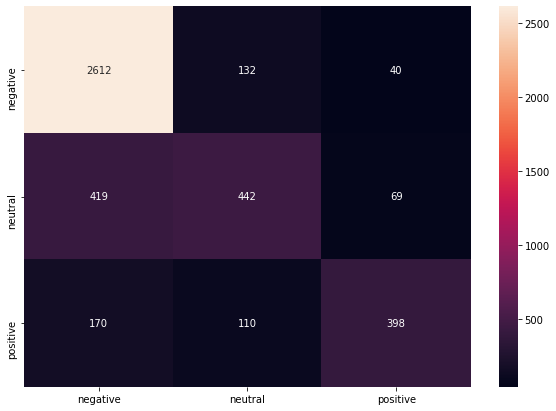

In [ ]:
t = time.process_time()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

lrc = LogisticRegression(random_state=7, max_iter=1000, solver='saga', n_jobs=4, multi_class='auto')
lrc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', lrc.score(X_train, y_train))
print('Test Score: ', lrc.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

result_lrc = lrc.predict(X_test)
algo = ['Logistic Regression']
elapsed = [elapsed_time]
tr = [lrc.score(X_train, y_train)]
te = [lrc.score(X_test, y_test)]
recall = [recall_score(y_test, result_lrc, average='micro')]
precision = [precision_score(y_test, result_lrc, average='micro')]

# Confusion Matrix, Classification report, 
from sklearn.metrics import classification_report
results_log = classification_report(y_test, result_lrc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat = confusion_matrix(y_test, result_lrc)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Using Random Forest to build model for the classification of reviews.

Train Score:  0.9966822794691648
Test Score:  0.7716302367941712
Elapsed Time: 379.84662866599956
              precision    recall  f1-score     support
negative       0.783593  0.957256  0.861762  2784.00000
neutral        0.692586  0.411828  0.516521   930.00000
positive       0.778539  0.502950  0.611111   678.00000
accuracy       0.771630  0.771630  0.771630     0.77163
macro avg      0.751573  0.624011  0.663131  4392.00000
weighted avg   0.763542  0.771630  0.749964  4392.00000
[[2665   84   35]
 [ 485  383   62]
 [ 251   86  341]]


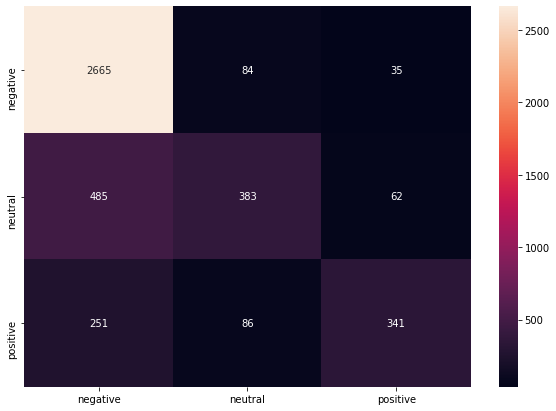

In [ ]:
t = time.process_time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

forest = RandomForestClassifier(n_estimators=250, n_jobs=4)
forest = forest.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', forest.score(X_train, y_train))
print('Test Score: ', forest.score(X_test, y_test)) 
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

result_forest = forest.predict(X_test)
algo.append('RandomForest')
elapsed.append(elapsed_time)
tr.append(forest.score(X_train, y_train))
te.append(forest.score(X_test, y_test))
recall.append(recall_score(y_test, result_forest, average='micro'))
precision.append(precision_score(y_test, result_forest, average='micro'))

# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
results_log = classification_report(y_test, result_forest, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

# Confusion Matrix
conf_mat_forest = confusion_matrix(y_test, result_forest)
print(conf_mat_forest)

df_cm = pd.DataFrame(conf_mat_forest, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7)) 
sns.heatmap(df_cm, annot=True, fmt='g')

### Using AdaBoost to build model for the classification of reviews.


Train Score:  0.8250390320062451
Test Score:  0.7509107468123861
Elapsed Time: 1983.0546993819999
              precision    recall  f1-score      support
negative       0.793407  0.907687  0.846708  2784.000000
neutral        0.577381  0.417204  0.484395   930.000000
positive       0.715888  0.564897  0.631492   678.000000
accuracy       0.750911  0.750911  0.750911     0.750911
macro avg      0.695558  0.629929  0.654198  4392.000000
weighted avg   0.735697  0.750911  0.736765  4392.000000
[[2527  184   73]
 [ 463  388   79]
 [ 195  100  383]]


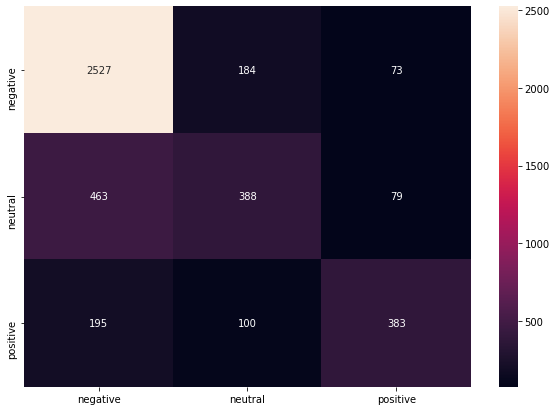

In [ ]:
t = time.process_time()
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=7, n_estimators= 250, learning_rate=0.1)
abc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', abc.score(X_train, y_train))
print('Test Score: ', abc.score(X_test, y_test))
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

result_abc = abc.predict(X_test)
algo.append('AdaBoost')
elapsed.append(elapsed_time)
tr.append(abc.score(X_train, y_train))
te.append(abc.score(X_test, y_test))
recall.append(recall_score(y_test,result_abc, average='micro'))
precision.append(precision_score(y_test, result_abc, average='micro'))

# Confusion Matrix, Classification report, 
results_log = classification_report(y_test, result_abc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat_abc = confusion_matrix(y_test, result_abc)
print(conf_mat_abc)

df_cm = pd.DataFrame(conf_mat_abc, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Using Gradient Boosting to build model for the classification of reviews.

Train Score:  0.8703161592505855
Test Score:  0.7725409836065574
Elapsed Time: 8466.150434571
              precision    recall  f1-score      support
negative       0.799569  0.932830  0.861074  2784.000000
neutral        0.658662  0.412903  0.507601   930.000000
positive       0.734403  0.607670  0.665052   678.000000
accuracy       0.772541  0.772541  0.772541     0.772541
macro avg      0.730878  0.651134  0.677909  4392.000000
weighted avg   0.759672  0.772541  0.755967  4392.000000
[[2597  114   73]
 [ 470  384   76]
 [ 181   85  412]]


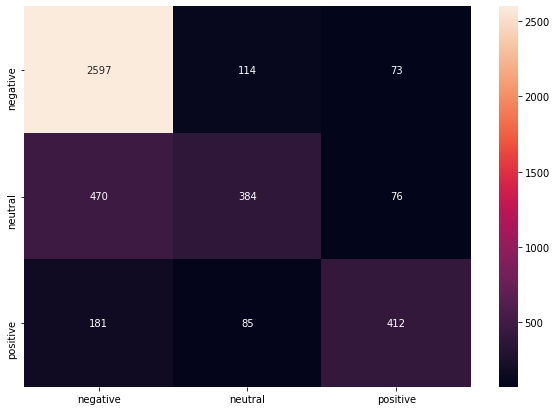

In [ ]:
t = time.process_time()
X_train, X_test, y_train, y_test = train_test_split(X_features, integer_encoded_labels, test_size=0.3, random_state=7)

gbc = GradientBoostingClassifier(random_state=7, n_estimators=250, max_depth=5, min_samples_leaf=3)
gbc.fit(X_train, np.ravel(y_train,order='C'))

print('Train Score: ', gbc.score(X_train, y_train))
print('Test Score: ', gbc.score(X_test, y_test))
elapsed_time = time.process_time() - t
print('Elapsed Time:', elapsed_time)

result_gbc = gbc.predict(X_test)
algo.append('Gradient Boosting')
elapsed.append(elapsed_time)
tr.append(gbc.score(X_train, y_train))
te.append(gbc.score(X_test, y_test))
recall.append(recall_score(y_test, result_gbc, average='micro'))
precision.append(precision_score(y_test, result_gbc, average='micro'))

# Confusion Matrix
results_log = classification_report(y_test, result_gbc, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

conf_mat_gbc = confusion_matrix(y_test, result_gbc)
print(conf_mat_gbc)

df_cm = pd.DataFrame(conf_mat_gbc, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset.

In [ ]:
# DataFrame to compare results for CountVectorizer.
print('\n CountVectorizer Comparsion Classification Results \n')
print(results_vec)


 CountVectorizer Comparsion Classification Results 

                     TrainScore  TestScore    Recall  Precision  ElapsedTime
Model                                                                       
Logistic Regression    0.935402   0.787568  0.787568   0.787568   299.762083
RandomForest           0.996682   0.778005  0.778005   0.778005   118.232659
AdaBoost               0.818794   0.751138  0.751138   0.751138  1598.508077
Gradient Boosting      0.847678   0.769126  0.769126   0.769126  5322.985972


In [ ]:
# DataFrame to compare results for TfidfVectorizer.
print('\n TfidfVectorizer Comparsion Classification Results \n')
results_Tfid = pd.DataFrame()
results_Tfid['Model'] = algo
results_Tfid['TrainScore'] = tr
results_Tfid['TestScore'] = te
results_Tfid['Recall'] = recall
results_Tfid['Precision'] = precision
results_Tfid['ElapsedTime'] = elapsed
results_Tfid = results_Tfid.set_index('Model')
print(results_Tfid)


 TfidfVectorizer Comparsion Classification Results 

                     TrainScore  TestScore    Recall  Precision  ElapsedTime
Model                                                                       
Logistic Regression    0.878318   0.785974  0.785974   0.785974    76.716630
RandomForest           0.996682   0.771630  0.771630   0.771630   379.846629
AdaBoost               0.825039   0.750911  0.750911   0.750911  1983.054699
Gradient Boosting      0.870316   0.772541  0.772541   0.772541  8466.150435



I used the tweeter.cvs dataset and numeric sentiment score on the scale of 1 to 3 (3: positive, 2: neutral, and 1: negative).

The goal was to build a model for text-classification using four different methods: Logistic Regression, RandomForest, AdaBoost, and Gradient Boosting. 

I pre-processed the data using variuos techniques and libraries. The pre-processed data is converted to numbers, so that we can feed the data in the model.  From a review of the feature names, underscores were detected and were then removed.  

After building the classification model, predicted result for the test data.

Note that the full set of features names (12,052) were used.

Best results were obtained with Logistic Regression with a test score of .788251.  Logistic Regression also had the lowest elapsed time of 2.61558. Logistic Regress is a good choice since the Y variable has only three possibilities (positive, neutral, and negative). 

It appears that the Random Forest suffers from overfitting with a training score of .996682.  Minimum tuning was perperformed, therefore it is reasonable to expect that better performance is possible.

The two above results tables clearly present the comparative results from the eight combinations of models and vectorizers.

While slightly different results were obtained from CountVectorizer and TfidfVectorizer, I was expecting something more significant. 

Warren Camp




